 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returns = pd.read_csv(whale_returns_csv)


In [3]:
whale_returns['Date'] = pd.to_datetime(whale_returns['Date'])


In [4]:
#whale_returns = whale_returns.set_index('Date') 
whale_returns.set_index(pd.to_datetime(whale_returns['Date'], infer_datetime_format=True), inplace=True, )
whale_returns.head(10)

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-02,2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,2015-03-12,0.008265,0.010272,0.013117,0.010801


In [5]:
# Drop the extra date column
whale_returns.drop(columns=['Date'], inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [6]:
# Count nulls
# YOUR CODE HERE
whale_returns.isnull().count().sum()

4240

In [7]:
# Drop nulls
# YOUR CODE HERE
whale_returns = whale_returns.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [8]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns = pd.read_csv(algo_returns_csv)


In [9]:
algo_returns.set_index(pd.to_datetime(algo_returns['Date'], infer_datetime_format=True), inplace=True)
algo_returns.head()


,Date,Algo 1,Algo 2
Date,,,
2014-05-28,2014-05-28,0.001745,NaN
2014-05-29,2014-05-29,0.003978,NaN
2014-05-30,2014-05-30,0.004464,NaN
2014-06-02,2014-06-02,0.005692,NaN
2014-06-03,2014-06-03,0.005292,NaN


In [10]:
# Drop the extra date column
algo_returns.drop(columns=['Date'], inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [11]:
# Count nulls
# YOUR CODE HERE
algo_returns.isnull().count().sum()

2482

In [12]:
# Drop nulls
# YOUR CODE HERE
algo_returns = algo_returns.dropna()

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [13]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history = pd.read_csv(sp500_history_csv)


In [14]:
sp500_history.set_index(pd.to_datetime(sp500_history['Date'], infer_datetime_format=True), inplace=True)
sp500_history.head()

,Date,Close
Date,,
2019-04-23,23-Apr-19,$2933.68
2019-04-22,22-Apr-19,$2907.97
2019-04-18,18-Apr-19,$2905.03
2019-04-17,17-Apr-19,$2900.45
2019-04-16,16-Apr-19,$2907.06


In [15]:
sp500_history = sp500_history.sort_index(ascending=True)

In [16]:
# Drop the extra date column
sp500_history.drop(columns=['Date'], inplace=True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [17]:
#removing dollar sign:
sp500_history['Close'] = sp500_history['Close'].str.replace('$', '')

In [18]:
# Check Data Types
# YOUR CODE HERE
sp500_history.dtypes

Close    object
dtype: object

In [19]:
# Fix Data Types
# YOUR CODE HERE
#convert the data types from string to float
sp500_history['Close'] = sp500_history['Close'].astype('float')
sp500_history.dtypes

Close    float64
dtype: object

In [20]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_history['Close'] = sp500_history['Close'].pct_change()

In [21]:
# Drop nulls
# YOUR CODE HERE
sp500_history['Close'].dropna(inplace=True)

In [22]:
# Rename Column
# YOUR CODE HERE
sp500_history.rename(columns= {'Close': 'S&P 500'},inplace=True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [23]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_data_frame = pd.concat([whale_returns,algo_returns, sp500_history ], axis='columns', join='inner')
combined_data_frame.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

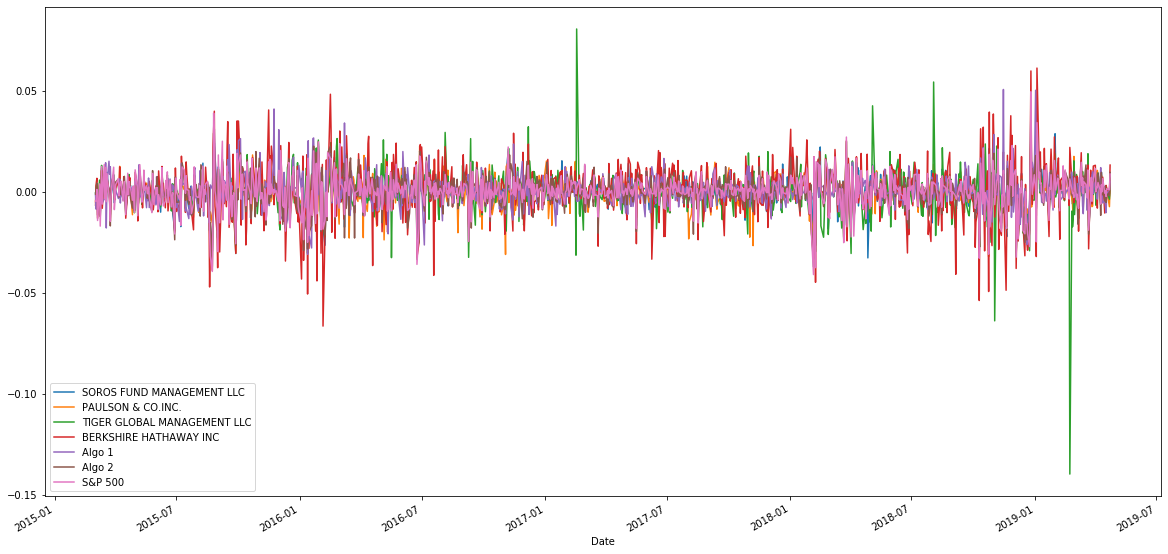

In [24]:
# Plot daily returns
# YOUR CODE HERE
combined_data_frame.plot(figsize=(20,10))

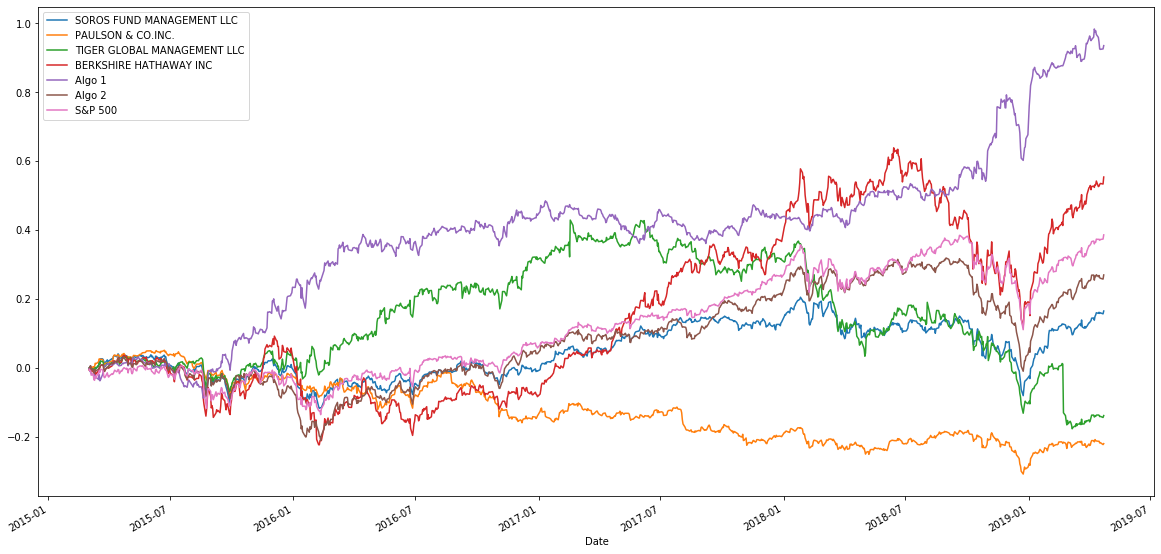

In [25]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + combined_data_frame).cumprod()-1
cumulative_returns.head()
cumulative_returns.plot(figsize=(20,10))


In [26]:
# delete from here

In [27]:
combined_data_frame

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


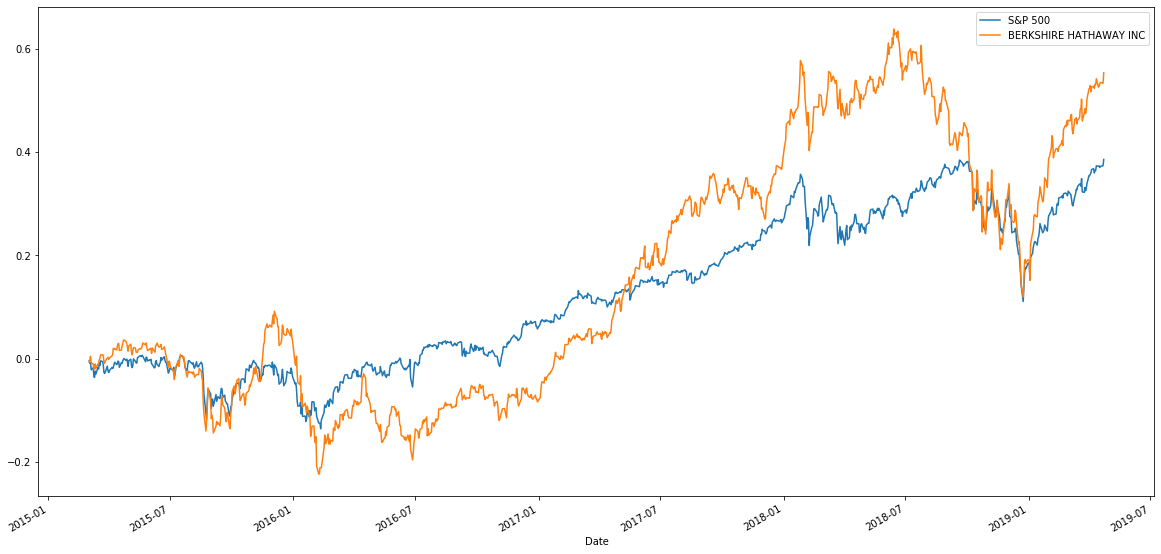

In [28]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + combined_data_frame[['S&P 500','BERKSHIRE HATHAWAY INC']]).cumprod()-1
cumulative_returns.head()
cumulative_returns.plot(figsize=(20,10))


# delete to here

## Performance Analysis¶
### Does any portfolio outperform the S&P 500
### - Yes, Algo 1 and BERKSHIRE HATHAWAY INC

In [29]:
cumulative_returns.tail(1)

,S&P 500,BERKSHIRE HATHAWAY INC
Date,,
2019-04-23,0.385517,0.553401


---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

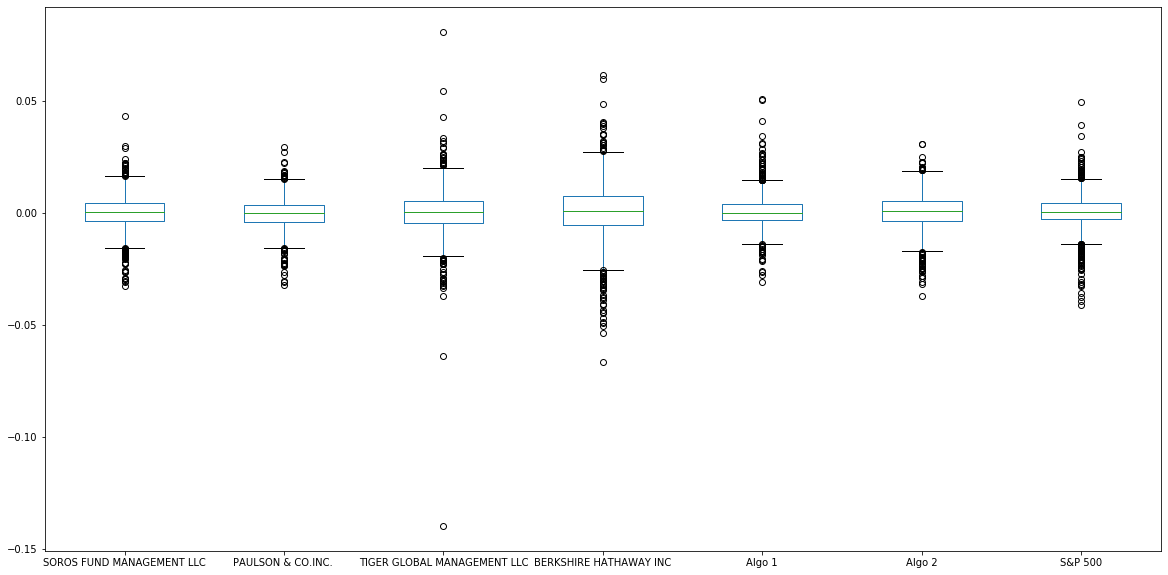

In [30]:
# Box plot to visually show risk
# YOUR CODE HERE
combined_data_frame.plot.box(figsize= (20,10))



### Which box has the largest spread? Which has the smallest spread? 
#### - Tiger Global Management LLC has the largest spread 
#### - Paulson & CO.INC has the smallest spread

In [31]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
daily_std = combined_data_frame.std()

In [32]:
#Which portfolios are riskier than the S&P 500?
daily_std.sort_values(ascending = False)

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500                        0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Which portfolios are riskier than the S&P 500?
##### -BERKSHIRE HATHAWAY INC and TIGER GLOBAL MANAGEMENT LLC are riskier than S&P 500 because they have higher STDs than S&P500

In [33]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
riskier_portfolios= daily_std.sort_values(ascending = False).head(3)
riskier_portfolios

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500                        0.008554
dtype: float64

In [34]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = daily_std * np.sqrt(252)
#annualized_std.sort_values(ascending = False)

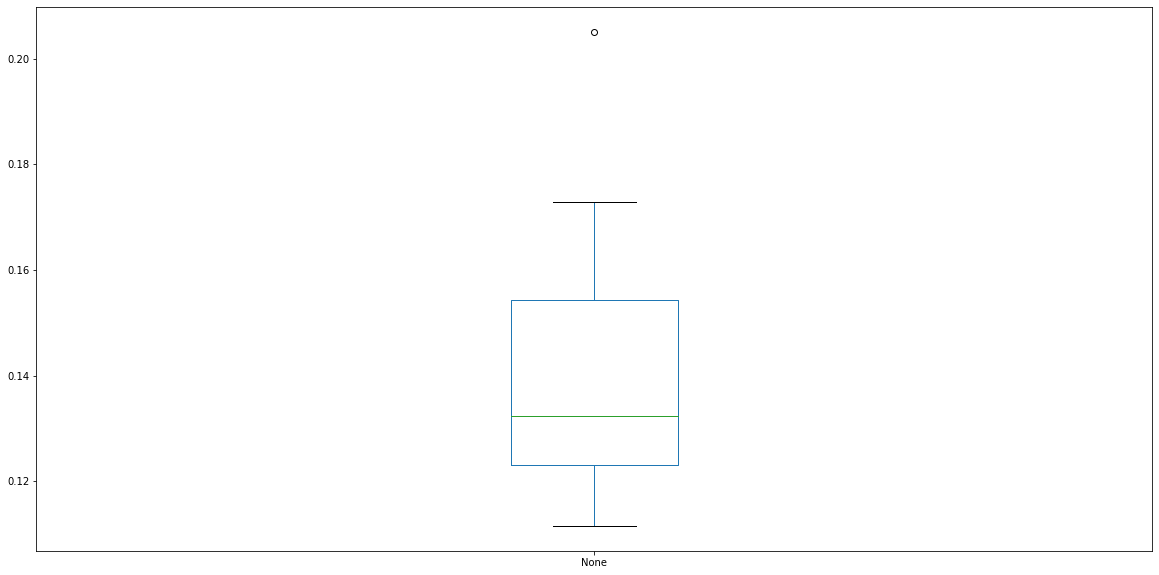

In [35]:
annualized_std.plot.box(figsize= (20,10))

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

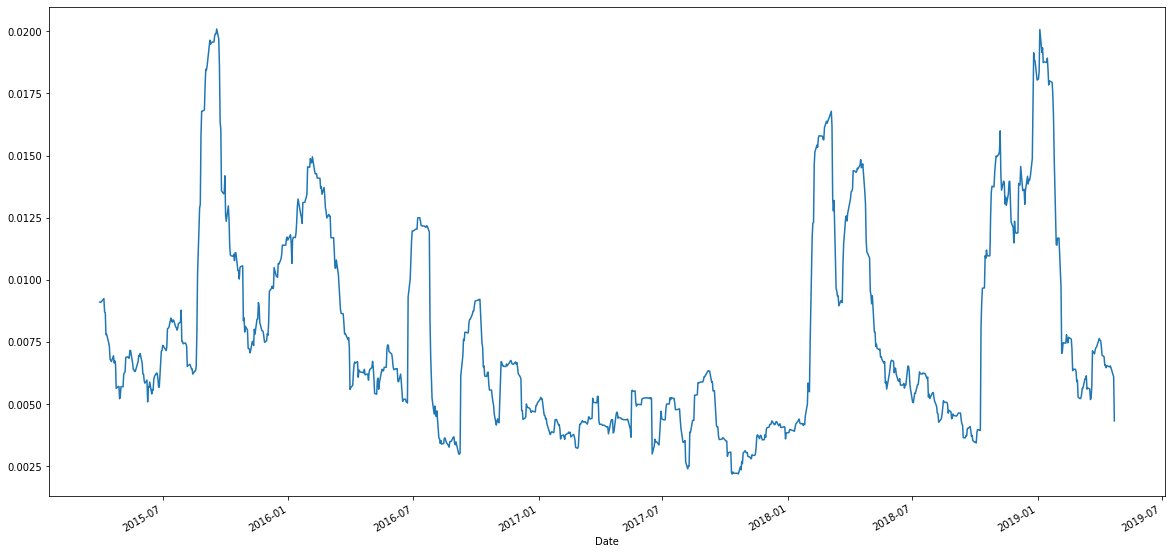

In [36]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE
sp500_rolling_std = combined_data_frame['S&P 500'].rolling(window=21).std().plot(figsize=(20,10))

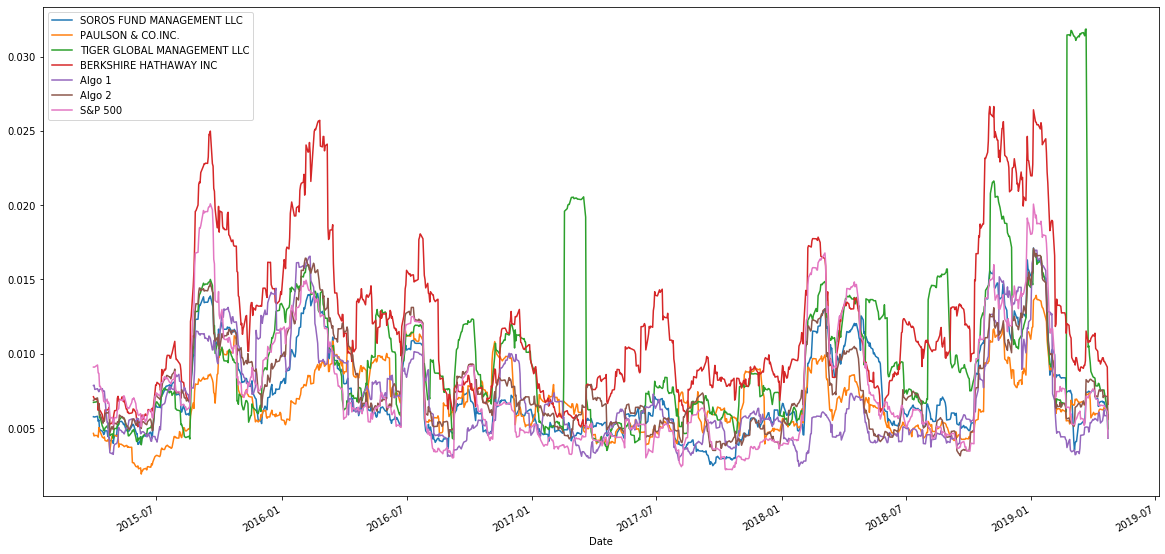

In [37]:
#Calculate and plot the rolling standard deviation for all returns
combined_data_frame.rolling(window=21).std().plot(figsize=(20,10))

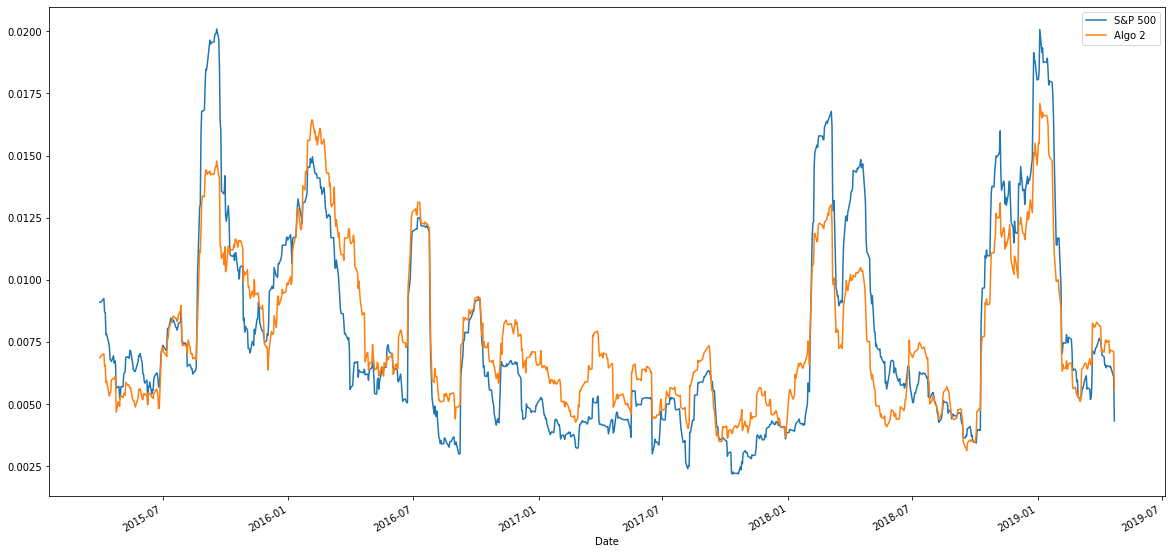

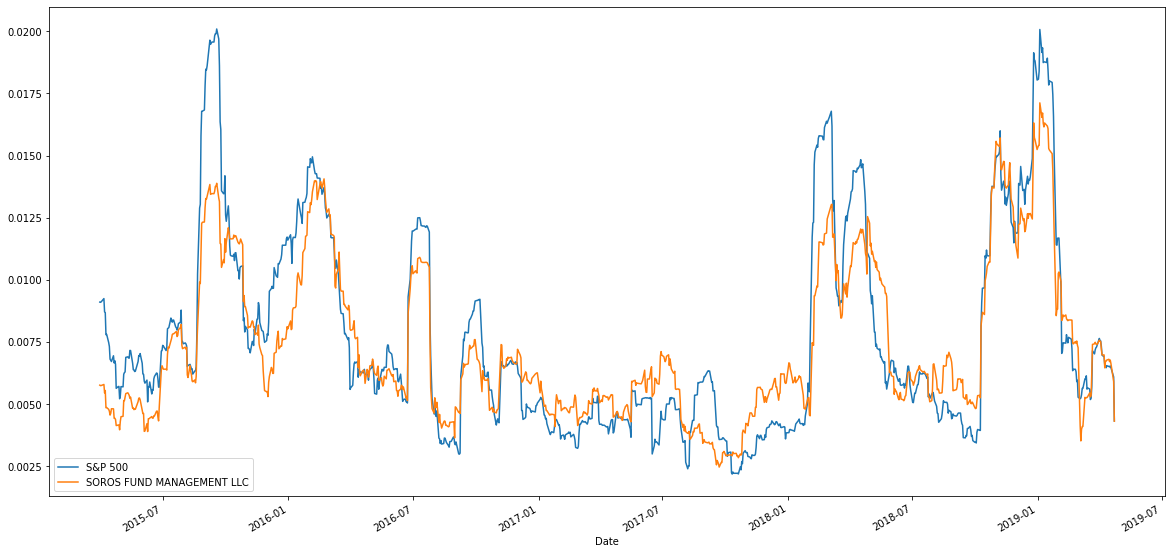

In [38]:
# one-by-one comparison (change index)
combined_data_frame[['S&P 500',combined_data_frame.columns[5]]].rolling(window=21).std().plot(figsize=(20,10))
combined_data_frame[['S&P 500',combined_data_frame.columns[0]]].rolling(window=21).std().plot(figsize=(20,10))

SOROS and Algo 2 are most closely correlated with the S&P

In [39]:
# Correlation Table
# YOUR CODE HERE
correlation = combined_data_frame.corr()
correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


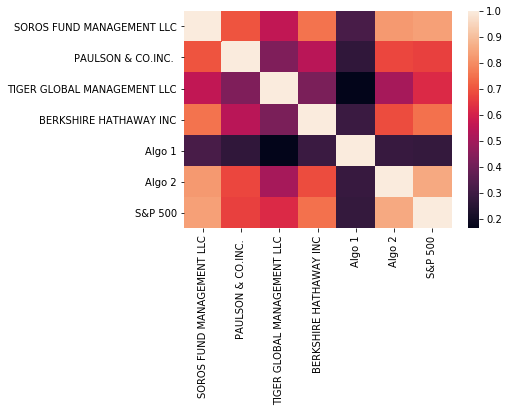

In [40]:
sns.heatmap(correlation)

### Which returns most closely mimic the S&P?
##### Algo2 is most closely mimicing the S&P as it has the highest correlation value, then Soros Fund Management. 

In [41]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE
#Berkshire Hathaway Inc
BH_covariance = combined_data_frame['BERKSHIRE HATHAWAY INC'].cov(combined_data_frame['S&P 500'])
sp_variance = combined_data_frame['S&P 500'].var()
BH_beta = BH_covariance / sp_variance
BH_beta

1.1347891297491723

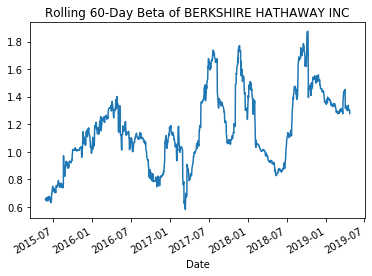

In [42]:
# Calculate 60-day rolling variance of S&P 500 + BH_covariance
#rolling_bh_covariance = combined_data_frame['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_data_frame['S&P 500'])
rolling_bh_covariance = combined_data_frame['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_data_frame['S&P 500'])
rolling_variance = combined_data_frame['S&P 500'].rolling(window=60).var()
rolling_bh_beta = rolling_bh_covariance/rolling_variance

rolling_bh_beta.plot(title='Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC')




### Does the portfolio seem sensitive to movements in the S&P 500?
##### - Yes, because the beta plot has a positive trend (mostly greater than 1)

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [43]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [44]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (combined_data_frame.mean() * 252) / (combined_data_frame.std() * np.sqrt(252))
sharpe_ratios.sort_values(ascending = False)

Algo 1                         1.378648
S&P 500                        0.648267
BERKSHIRE HATHAWAY INC         0.621810
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
PAULSON & CO.INC.             -0.483570
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

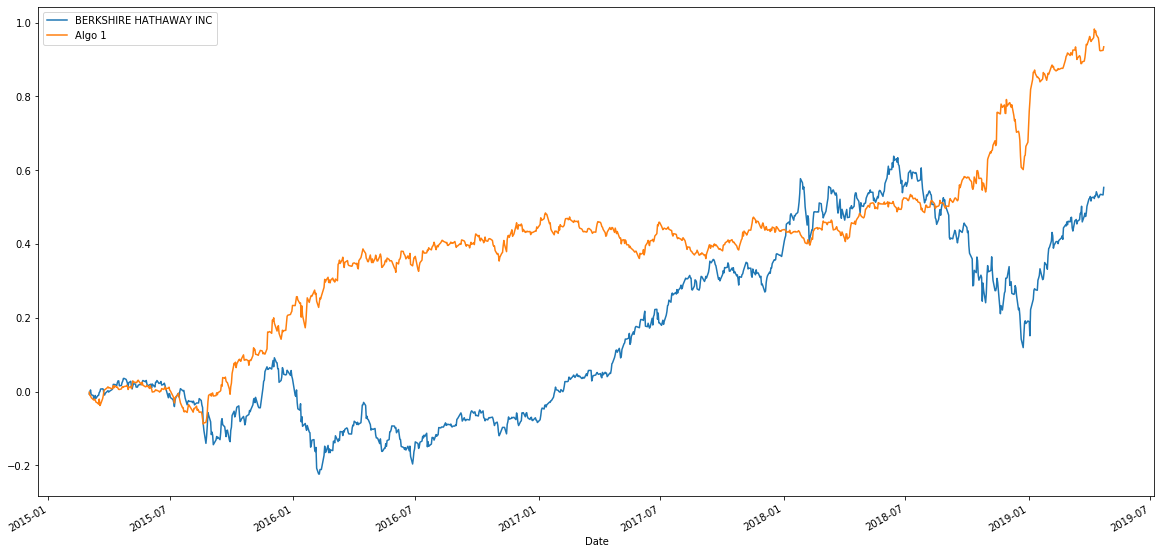

In [45]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + combined_data_frame[['BERKSHIRE HATHAWAY INC','Algo 1']]).cumprod()-1
cumulative_returns.head()
cumulative_returns.plot(figsize=(20,10))


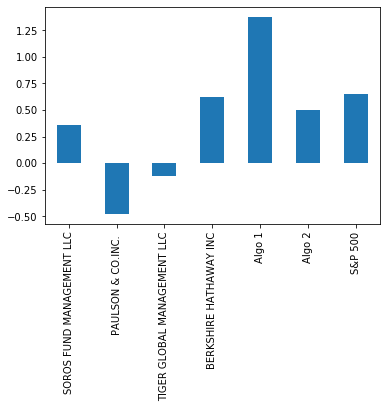

In [46]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind='bar')

#### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.
##### - Based on the aforementioned sharpe ratios, Algo 1 outperforms both the S&P 500 and the whales portfolios. However, Algo 2 slightly underperforms both the market and the whales portfolios as given both the sharpe ratios and the returns

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [47]:
# Read the first stock
# YOUR CODE HERE
amazon_csv = Path("Resources/amazon2015.csv")
# YOUR CODE HERE
amazon = pd.read_csv(amazon_csv, infer_datetime_format=True)
amazon['Date'] = pd.to_datetime(amazon['Date']).dt.date
amazon.set_index('Date', inplace=True)
amazon.rename(columns= {'Close': 'Amazon'},inplace=True)
amazon.head(10)

,Amazon
Date,
2015-03-03,384.61
2015-03-04,382.72
2015-03-05,387.83
2015-03-06,380.09
2015-03-09,378.56
2015-03-10,369.51
2015-03-11,366.37
2015-03-12,374.24
2015-03-13,370.58


In [48]:
# Read the second stock
# YOUR CODE HERE
nvda_csv = Path("Resources/NVDA.csv")
# YOUR CODE HERE
nvda = pd.read_csv(nvda_csv, infer_datetime_format=True)
nvda['Date'] = pd.to_datetime(nvda['Date']).dt.date
nvda.set_index('Date', inplace=True)
nvda.rename(columns= {'Close': 'NVIDIA'},inplace=True)
nvda.head(10)

,NVIDIA
Date,
2015-03-03,22.18
2015-03-04,22.43
2015-03-05,22.86
2015-03-06,22.55
2015-03-09,22.61
2015-03-10,23.00
2015-03-11,22.88
2015-03-12,22.67
2015-03-13,22.70


In [49]:
# Read the third stock
# YOUR CODE HERE
msci_csv = Path("Resources/MSCI.csv")
# YOUR CODE HERE
msci = pd.read_csv(msci_csv, infer_datetime_format=True)
msci['Date'] = pd.to_datetime(msci['Date']).dt.date
msci.set_index('Date', inplace=True)
msci.rename(columns= {'Close': 'MSCI'},inplace=True)
msci.head(10)

,MSCI
Date,
2015-03-03,57.32
2015-03-04,56.78
2015-03-05,55.40
2015-03-06,55.45
2015-03-09,55.66
2015-03-10,54.72
2015-03-11,55.83
2015-03-12,57.18
2015-03-13,56.74


In [51]:
my_prot_df = pd.concat([nvda, amazon, msci], axis='columns', join='inner')
my_prot_df.head()


,NVIDIA,Amazon,MSCI
Date,,,
2015-03-03,22.18,384.61,57.32
2015-03-04,22.43,382.72,56.78
2015-03-05,22.86,387.83,55.40
2015-03-06,22.55,380.09,55.45
2015-03-09,22.61,378.56,55.66


In [52]:
# Reset the index
# YOUR CODE HERE
my_prot_df = my_prot_df.pct_change()

In [53]:
my_prot_df.sum()

NVIDIA    2.514044
Amazon    1.751967
MSCI      1.441249
dtype: float64

In [54]:
# Drop Nulls
# YOUR CODE HERE
my_prot_df.dropna(inplace = True)


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [55]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
my_prot_df['weighted'] = my_prot_df.dot(weights)
my_prot_df.head()

,NVIDIA,Amazon,MSCI,weighted
Date,,,,
2015-03-04,0.011271,-0.004914,-0.009421,-0.001021
2015-03-05,0.019171,0.013352,-0.024304,0.002739
2015-03-06,-0.013561,-0.019957,0.000903,-0.010872
2015-03-09,0.002661,-0.004025,0.003787,0.000808
2015-03-10,0.017249,-0.023906,-0.016888,-0.007849


In [56]:
my_prot_df['weighted']

Date
2015-03-04   -0.001021
2015-03-05    0.002739
2015-03-06   -0.010872
2015-03-09    0.000808
2015-03-10   -0.007849
                ...   
2019-04-09   -0.005517
2019-04-10    0.011367
2019-04-11    0.001065
2019-04-12   -0.000241
2019-04-15   -0.007459
Name: weighted, Length: 1037, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [61]:
# YOUR CODE HERE
all_comb_df = pd.concat([combined_data_frame, my_prot_df['weighted']], axis='columns', join='inner')
all_comb_df.rename(columns= {'weighted': 'My Prot'},inplace=True)
all_comb_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Prot
Date,,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.001021
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.002739
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.010872
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.000808
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961,-0.007849


In [62]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
all_comb_df.dropna(inplace = True)


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [64]:
# Risk
# YOUR CODE HERE
all_daily_std = all_comb_df.std()
all_annualized_std = all_daily_std * np.sqrt(252)
all_annualized_std.sort_values(ascending = False)


My Prot                        0.251414
BERKSHIRE HATHAWAY INC         0.205536
TIGER GLOBAL MANAGEMENT LLC    0.173384
S&P 500                        0.136085
Algo 2                         0.132690
SOROS FUND MANAGEMENT LLC      0.125624
Algo 1                         0.121111
PAULSON & CO.INC.              0.111670
dtype: float64

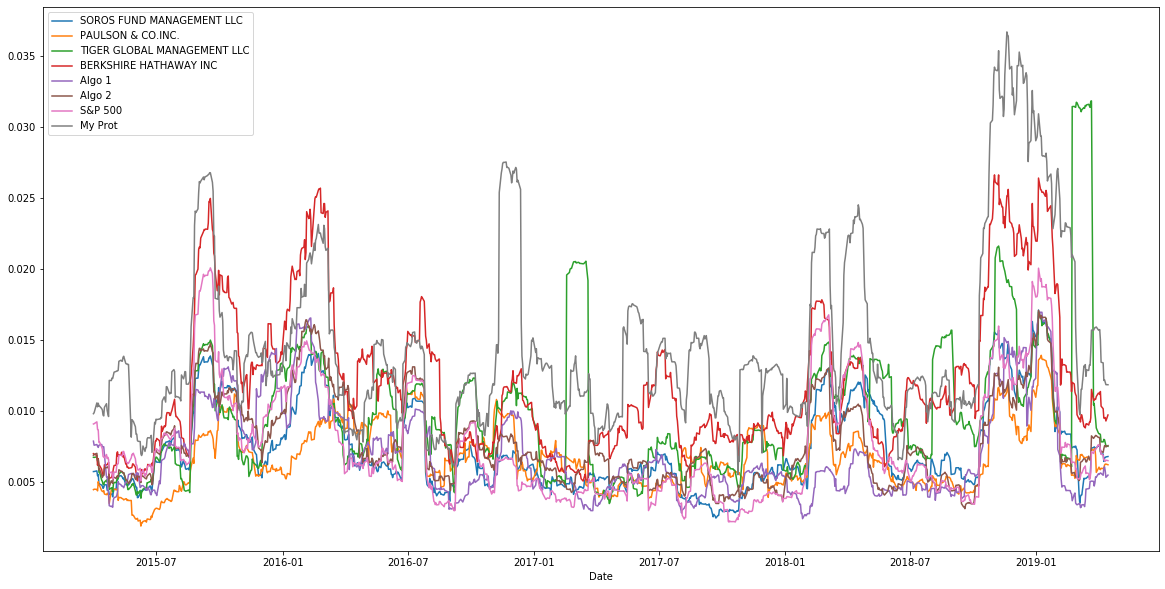

In [66]:
# Rolling
# YOUR CODE HERE
#all_comb_df[['S&P 500','weighted']].rolling(window=21).std().plot(figsize = (20, 10))
all_comb_df.rolling(window=21).std().plot(figsize = (20, 10))

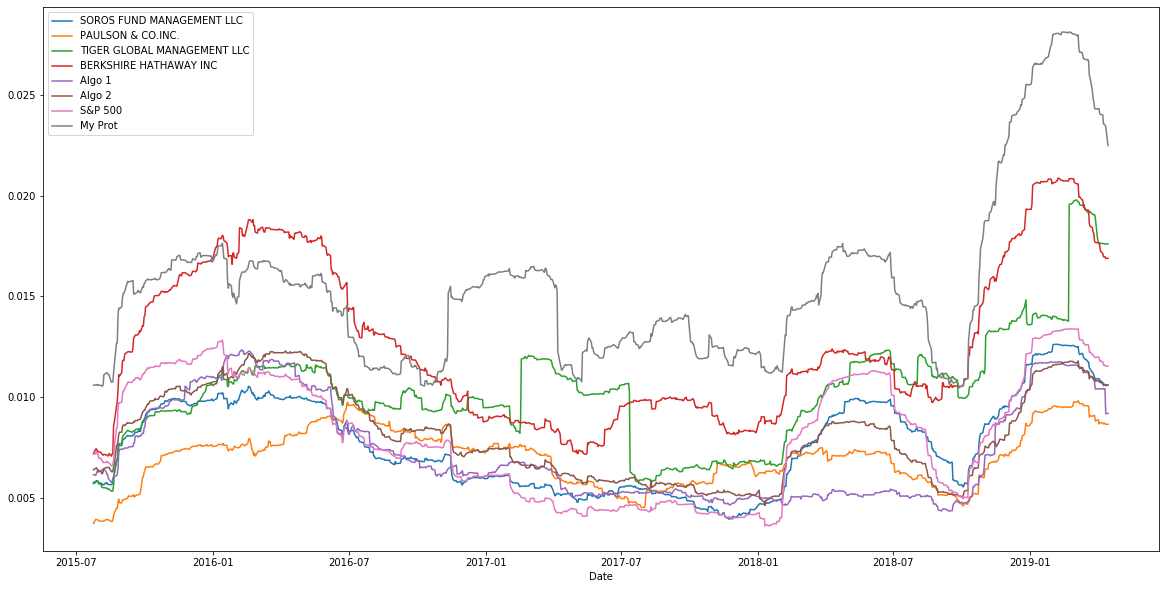

In [69]:
all_comb_df.rolling(window=100).std().plot(figsize = (20, 10))

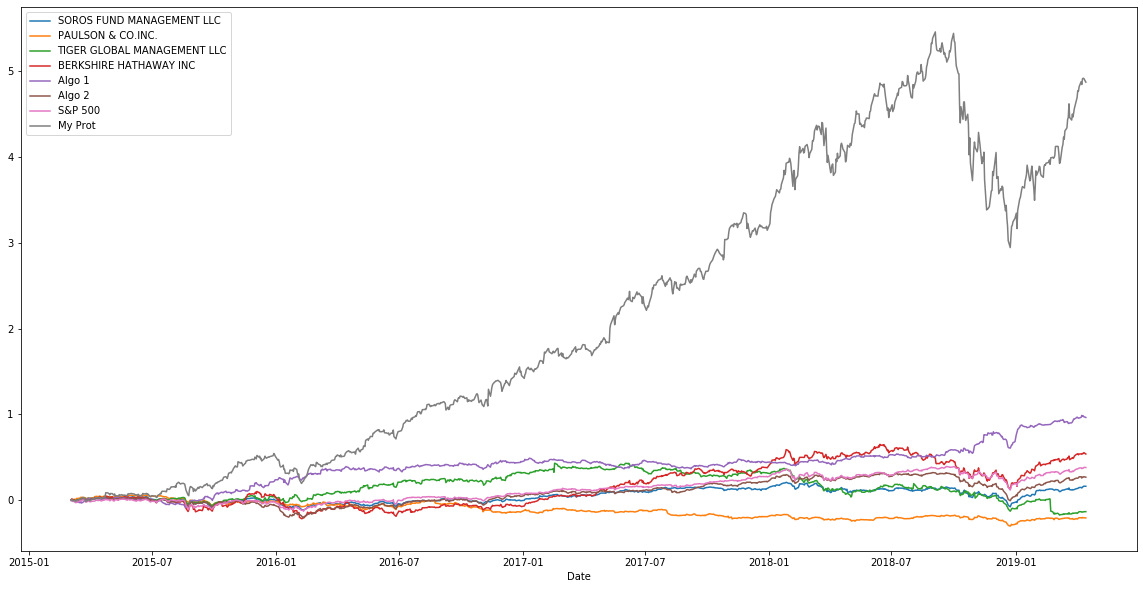

In [70]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + all_comb_df).cumprod()-1
cumulative_returns.head()
cumulative_returns.plot(figsize=(20,10))

In [73]:
# Beta
# YOUR CODE HERE
my_covariance = all_comb_df['My Prot'].cov(all_comb_df['S&P 500'])
sp_variance = all_comb_df['S&P 500'].var()
my_beta = my_covariance / sp_variance
my_beta

1.3594571307047116

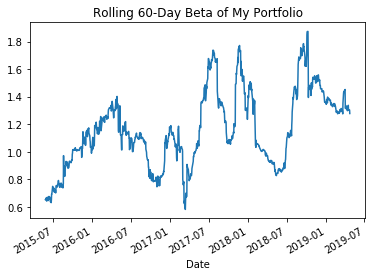

In [74]:
# Calculate 60-day rolling variance of S&P 500 + BH_covariance
#rolling_bh_covariance = combined_data_frame['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_data_frame['S&P 500'])
rolling_my_covariance = all_comb_df['My Prot'].rolling(window=60).cov(combined_data_frame['S&P 500'])
rolling_variance = all_comb_df['S&P 500'].rolling(window=60).var()
rolling_my_beta = rolling_my_covariance/rolling_variance

rolling_bh_beta.plot(title='Rolling 60-Day Beta of My Portfolio')

In [75]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
all_sharpe_ratios = (all_comb_df.mean() * 252) / (all_comb_df.std() * np.sqrt(252))
all_sharpe_ratios.sort_values(ascending = False)

My Prot                        1.838817
Algo 1                         1.413330
S&P 500                        0.641427
BERKSHIRE HATHAWAY INC         0.610299
Algo 2                         0.497452
SOROS FUND MANAGEMENT LLC      0.348821
TIGER GLOBAL MANAGEMENT LLC   -0.118190
PAULSON & CO.INC.             -0.455792
dtype: float64

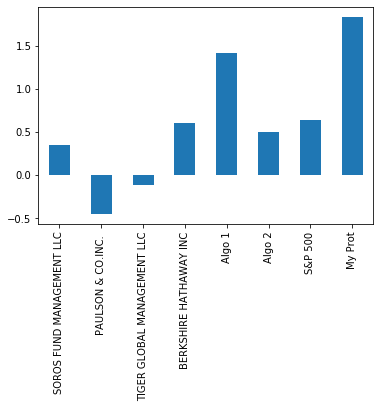

In [88]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
all_sharpe_ratios.plot(kind='bar')

## Include correlation analysis to determine which stocks (if any) are correlated

In [81]:
all_comb_stk_df = my_prot_df
all_comb_stk_df = pd.concat([all_comb_df, my_prot_df], axis='columns', join='inner')
all_comb_stk_df.drop(columns=['weighted'],inplace=True)

In [82]:
all_comb_stk_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Prot,NVIDIA,Amazon,MSCI
Date,,,,,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.001021,0.011271,-0.004914,-0.009421
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.002739,0.019171,0.013352,-0.024304
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.010872,-0.013561,-0.019957,0.000903
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.000808,0.002661,-0.004025,0.003787
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961,-0.007849,0.017249,-0.023906,-0.016888
...,...,...,...,...,...,...,...,...,...,...,...
2019-04-09,-0.005657,-0.004396,-0.006536,-0.002497,0.012012,-0.011639,-0.006067,-0.005517,-0.013192,-0.007579,0.004218
2019-04-10,0.009808,0.008366,0.002912,0.005269,-0.004221,0.009632,0.003478,0.011367,0.015006,0.006259,0.012837
2019-04-11,0.003406,-0.003959,-0.000637,-0.000496,0.001705,-0.001568,0.000038,0.001065,-0.002915,-0.001765,0.007875


In [84]:
# YOUR CODE HERE
all_correlation = all_comb_stk_df.corr()
all_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Prot,NVIDIA,Amazon,MSCI
SOROS FUND MANAGEMENT LLC,1.000000,0.699904,0.560979,0.754366,0.321200,0.826733,0.837870,0.665427,0.471696,0.540202,0.599940
PAULSON & CO.INC.,0.699904,1.000000,0.434163,0.545841,0.268005,0.678153,0.669942,0.475908,0.321041,0.404326,0.437187
TIGER GLOBAL MANAGEMENT LLC,0.560979,0.434163,1.000000,0.424273,0.163772,0.507080,0.623872,0.423742,0.281623,0.354503,0.405176
BERKSHIRE HATHAWAY INC,0.754366,0.545841,0.424273,1.000000,0.292336,0.688132,0.751188,0.700465,0.498660,0.618537,0.559509
Algo 1,0.321200,0.268005,0.163772,0.292336,1.000000,0.287705,0.279051,0.222000,0.120898,0.236482,0.196473
Algo 2,0.826733,0.678153,0.507080,0.688132,0.287705,1.000000,0.858840,0.648158,0.466247,0.502954,0.602375
S&P 500,0.837870,0.669942,0.623872,0.751188,0.279051,0.858840,1.000000,0.735846,0.497039,0.621816,0.679237
My Prot,0.665427,0.475908,0.423742,0.700465,0.222000,0.648158,0.735846,1.000000,0.847898,0.764199,0.688922
NVIDIA,0.471696,0.321041,0.281623,0.498660,0.120898,0.466247,0.497039,0.847898,1.000000,0.396891,0.364534
Amazon,0.540202,0.404326,0.354503,0.618537,0.236482,0.502954,0.621816,0.764199,0.396891,1.000000,0.462186


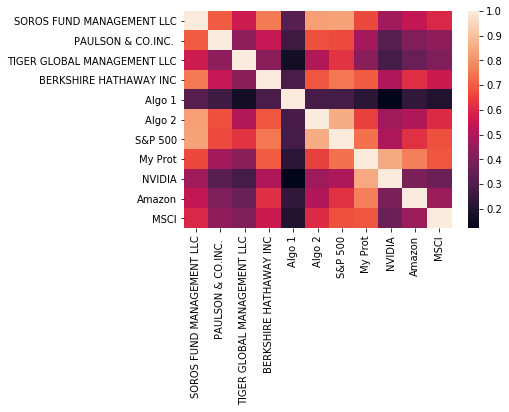

In [87]:
sns.heatmap(all_correlation)

## Analysis
#### - My protfolio outperforms others as indicated by the cumulative return and the sharpe ratios.
#### - Algo 2 and Soros are the most correlated with the market. Whereas Algo 1 is the least correlated.
#### - My protfolio is ranked the fourth correlated portfolio with the market.
#### - My protfolio consists of three stocks: 
       - NVIDIA: is the least correlated with the S&P500 and the most with my protfolio
       - MSCI: is the most correlated with S&P500 and the least with my protfolio
       - Amazon: is the median correlated stock with both my protfolio and S&P500
#### - The combination of the three stocks (NVIDIA, MSCI, Amazon) makes my protfolio the best performing portfolio among the other given portfolios.  